# **Air Quality Forecast: Machine Learning Model**

Air quality has a significant impact on human health and the environment. The main factors affecting air quality in India are:

- PM2.5 and PM10: Particulate matter
- NO, NO2, NOx: Nitrogen oxides
- NH3: Ammonia
- CO: Carbon monoxide
- SO2: Sulfur dioxide
- O3: Ozone
- Benzene, Toluene, Xylene: Volatile organic compounds

The primary goal of our air quality prediction model is to accurately forecast the Air Quality Index (AQI). AQI is an indicator that shows the level of air pollution and its effects on public health.

![AQI Mini Image](https://www.deq.ok.gov/wp-content/uploads/air-division/aqi_mini-768x432.png)



Our model predicts future AQI values based on the levels of various pollutants that affect air quality. These predictions assist decision-makers in issuing health alerts, formulating environmental policies, optimizing traffic and industrial management, and helping the general public plan their daily activities.

**What is the business problem you are trying to solve using machine learning?**
* The problem you are trying to solve in this project is to predict future Air Quality Index (AQI) values by analyzing the factors affecting AQI using machine learning algorithms. These predictions can be used to monitor air quality and develop improvement strategies. The goal is to identify the impact of various pollutant parameters (PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene) on AQI and to forecast AQI based on the future values of these parameters.

**Why are we interested in solving this problem? What impact will it have on the business?**

- Solving this problem is of great importance for public health, environmental sustainability, and the protection of biodiversity. Accurately predicting air quality allows authorities and the public to take measures against air pollution. For example, health alerts and precautions can be issued. Regulations and policies related to air pollution can be developed. Industrial and traffic management can be optimized. By providing a cleaner environment to society, the quality of life can be improved.

**What are some known issues with the data? (data entry errors, missing data, unit differences, etc.)**
- Missing Data: Several columns, including the target column, have missing values.
- Unit Differences: The Date column initially had a data type of object and has been converted to Datetime. 
- Seasonal Variations: Seasonal effects can introduce variability in the data.

In [1]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from warnings import filterwarnings
filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('./input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
df_city_day = pd.read_csv('city_day.csv')



FileNotFoundError: [Errno 2] No such file or directory: 'city_day.csv'

**ANALYZING THE DATASET**
- Size, data types, null value rate, statistical information for each column

In [3]:
df_city_day.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df_city_day.shape

(29531, 16)

In [5]:
df_city_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [6]:
df_city_day.describe().T 

,count,mean,std,min,25%,50%,75%,max
PM2.5,24933.0,67.450578,64.661449,0.04,28.820,48.57,80.5900,949.99
PM10,18391.0,118.127103,90.605110,0.01,56.255,95.68,149.7450,1000.00
NO,25949.0,17.574730,22.785846,0.02,5.630,9.89,19.9500,390.68
NO2,25946.0,28.560659,24.474746,0.01,11.750,21.69,37.6200,362.21
NOx,25346.0,32.309123,31.646011,0.00,12.820,23.52,40.1275,467.63
NH3,19203.0,23.483476,25.684275,0.01,8.580,15.85,30.0200,352.89
CO,27472.0,2.248598,6.962884,0.00,0.510,0.89,1.4500,175.81
SO2,25677.0,14.531977,18.133775,0.01,5.670,9.16,15.2200,193.86
O3,25509.0,34.491430,21.694928,0.01,18.860,30.84,45.5700,257.73
Benzene,23908.0,3.280840,15.811136,0.00,0.120,1.07,3.0800,455.03


In [7]:

def show_null_value(df):
    mis_val = df.isnull().sum()
    miss_val_percent= 100 * df.isna().sum()/ len(df) 
    mis_val_table = pd.concat([mis_val, miss_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    return mis_val_table_ren_columns 

show_null_value(df_city_day)

,Missing Values,% of Total Values
City,0,0.000000
Date,0,0.000000
PM2.5,4598,15.570079
PM10,11140,37.723071
NO,3582,12.129626
NO2,3585,12.139785
NOx,4185,14.171549
NH3,10328,34.973418
CO,2059,6.972334
SO2,3854,13.050692


In [8]:
df_city_day['Date'] = pd.to_datetime(df_city_day['Date'], format='%Y-%m-%d')
df_city_day = df_city_day.sort_values(by = 'Date')

In [9]:
df_city_day['Date'].min() , df_city_day['Date'].max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2020-07-01 00:00:00'))

In [10]:
df_city_day.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

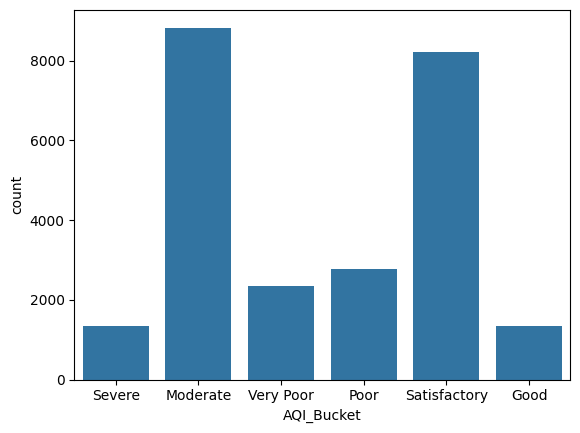

In [11]:
sns.countplot(x=df_city_day["AQI_Bucket"]);

We delete AQI_Bucket from the dataset because it is not a feature that affects air quality.

In [12]:
df_city_day = df_city_day.drop(["AQI_Bucket"], axis=1)

In [13]:
df_city_day.head(2)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.0,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,11.35,0.17,NaN,NaN,NaN


We drew boxplots to observe outlier data.

<Axes: >

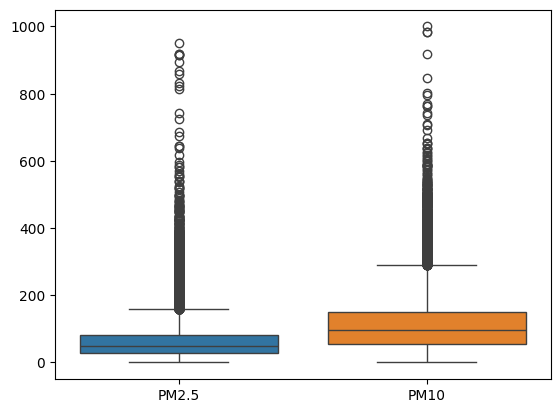

In [14]:
sns.boxplot(data=df_city_day[[ 'PM2.5', 'PM10']])

<Axes: >

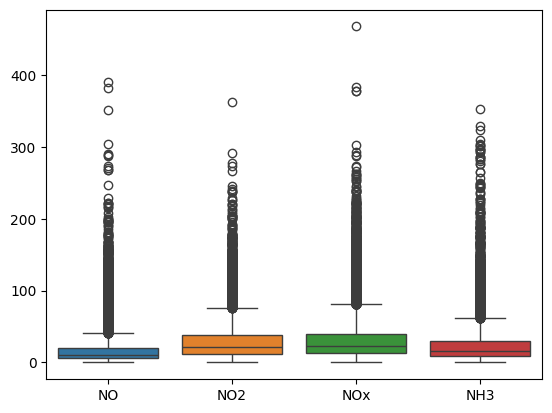

In [15]:
sns.boxplot(data=df_city_day[[ 'NO', 'NO2', 'NOx','NH3']]) 

<Axes: >

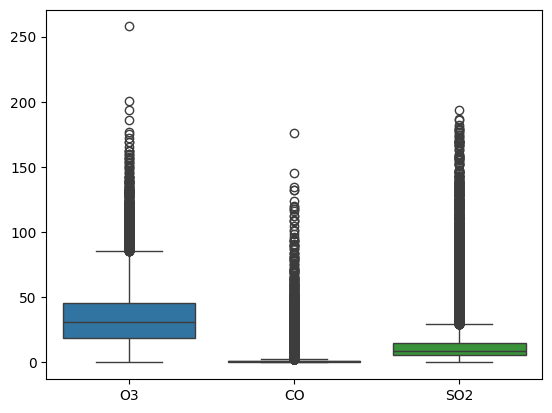

In [16]:
sns.boxplot(data=df_city_day[[ 'O3', 'CO', 'SO2']])

<Axes: >

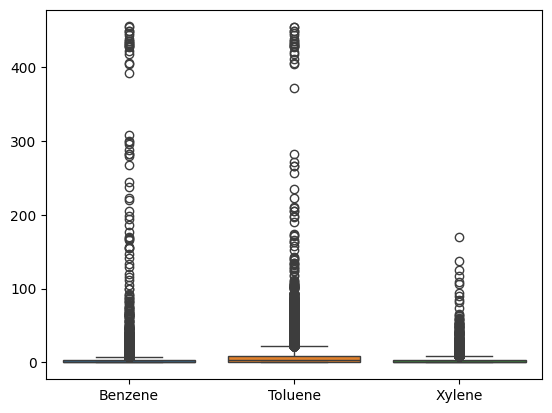

In [17]:
sns.boxplot(data=df_city_day[[ 'Benzene', 'Toluene', 'Xylene']])

**DATA EDITING PROCEDURES**
- Procedures related to outlier data, missing data, data that has little relationship with our target column

We observed that there were too many outliers in our independent variables. We thought that the modeling we would do with this data would give us incorrect results, so we changed the outliers.

In [18]:

def replace_outliers_with_quartiles(df):
    
    for column in df_city_day.select_dtypes(include=['number']).columns:
        Q1 = df_city_day[column].quantile(0.25)
        Q3 = df_city_day[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_city_day[column] = df_city_day[column].apply(
            lambda x: Q1 if x < lower_bound else (Q3 if x > upper_bound else x)
        )
    
    return df_city_day 

df_city_day = replace_outliers_with_quartiles(df_city_day)

In [19]:
df_city_day.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,29531,2018-05-14 05:40:15.807118080,2015-01-01 00:00:00,2017-04-16 00:00:00,2018-08-05 00:00:00,2019-09-03 00:00:00,2020-07-01 00:00:00,NaN
PM2.5,24933.0,54.975923,0.04,28.82,48.57,80.59,158.21,32.781561
PM10,18391.0,104.818086,0.01,56.255,95.68,149.7425,289.95,60.357602
NO,25949.0,12.472491,0.02,5.63,9.89,19.95,41.43,8.941774
NO2,25946.0,25.482607,0.01,11.75,21.69,37.62,76.4,16.698364
NOx,25346.0,26.520383,0.0,12.82,23.52,40.125625,81.06,17.876378
NH3,19203.0,19.661227,0.01,8.58,15.85,30.02,62.16,13.838362
CO,27472.0,0.952485,0.0,0.51,0.89,1.45,2.86,0.61346
SO2,25677.0,10.304869,0.01,5.67,9.16,15.22,29.54,5.908036
O3,25509.0,32.836577,0.01,18.86,30.84,45.57,85.63,17.969539


We created another box plot for the data in the columns of the current DataFrame.

<Axes: >

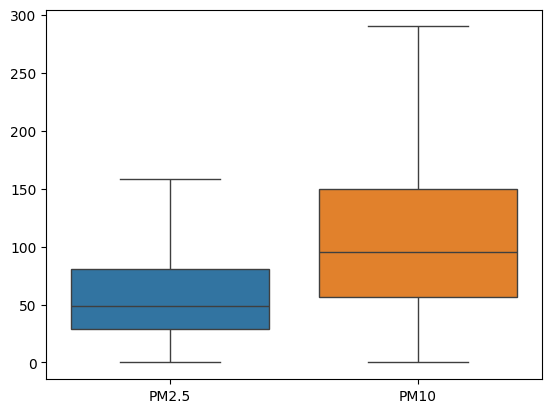

In [20]:
sns.boxplot(data=df_city_day[[ 'PM2.5', 'PM10']])

<Axes: >

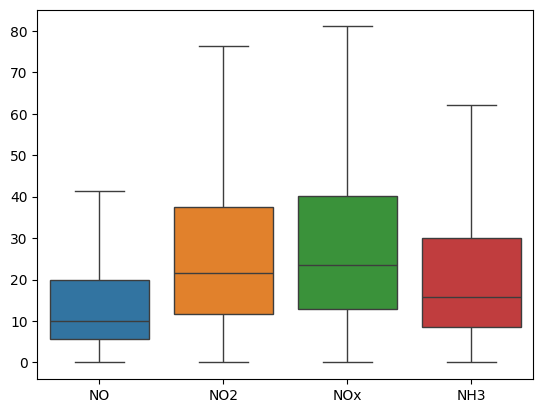

In [21]:
sns.boxplot(data=df_city_day[[ 'NO', 'NO2', 'NOx','NH3']])

<Axes: >

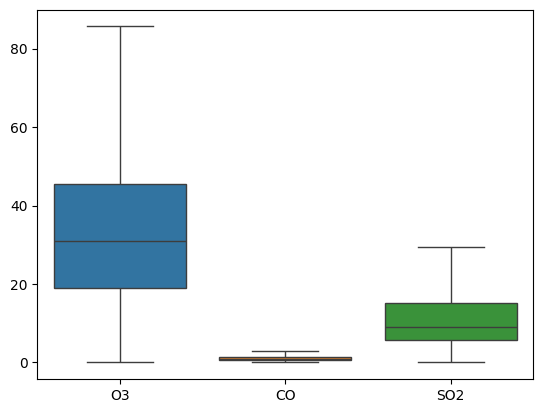

In [22]:
sns.boxplot(data=df_city_day[[ 'O3', 'CO', 'SO2']])

<Axes: >

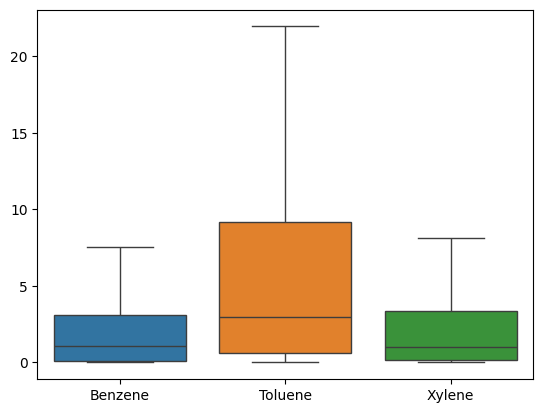

In [23]:
sns.boxplot(data=df_city_day[[ 'Benzene', 'Toluene', 'Xylene']])

In [24]:
df=df_city_day.drop(columns=['City'])

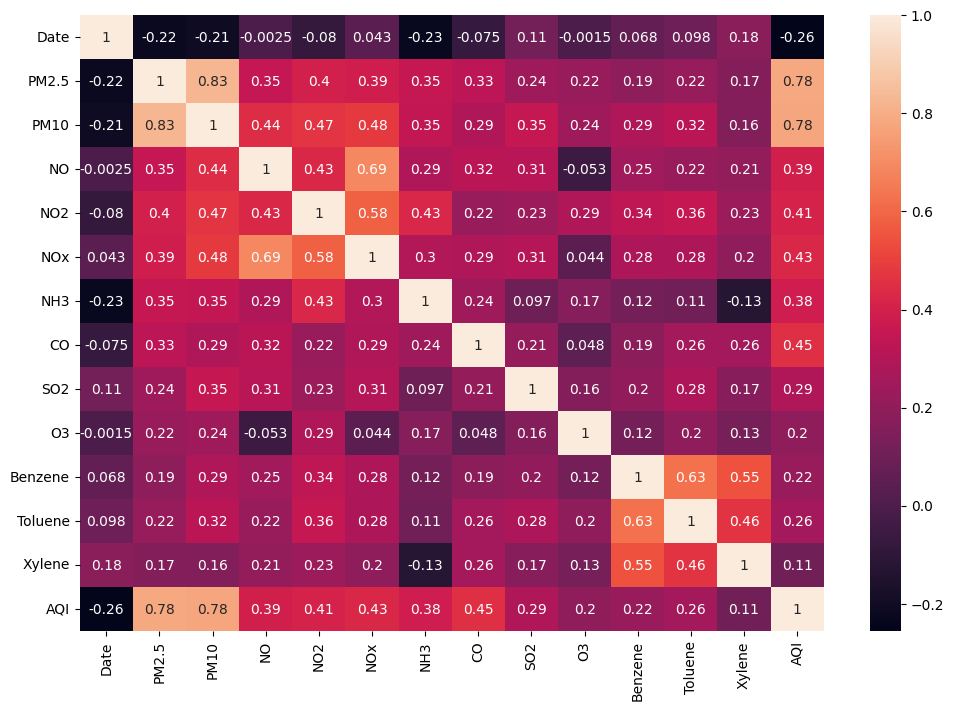

In [25]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(df.corr(),annot=True) 
plt.show() 

The most important variables affecting the AQI value appear to be PM2.5, PM10, CO and NOx.We will make predictions based on data above 0.25

In [26]:
df_city_day=df_city_day.drop(columns=['Xylene', 'Benzene','O3']) 

In [28]:
df_city_day.head(2)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,0.02,NaN
7834,Chennai,2015-01-01,NaN,NaN,16.30,15.39,22.68,4.59,1.17,9.20,NaN,NaN


THERE ARE NULL VALUES IN OUR TARGET VARIABLE AQI COLUMN, OUR TARGET COLUMN CANNOT BE EMPTY, THAT IS WHY WE CREATED A NEW DATASET FROM THOSE WITH FULL AQI.

In [29]:
df_full=df_city_day[df_city_day['AQI'].notna()]

In [30]:
df_full['Year'] = df_full['Date'].dt.year

In [31]:
df_full.head(2)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,Year
10229,Delhi,2015-01-01,80.59,149.745,19.95,36.39,40.1275,33.85,1.45,9.25,9.15,208.0,2015
10230,Delhi,2015-01-02,80.59,269.550,19.95,32.87,40.1275,31.83,1.45,6.65,20.09,208.0,2015


In [32]:
show_null_value(df_full) 

,Missing Values,% of Total Values
City,0,0.000000
Date,0,0.000000
PM2.5,678,2.728370
PM10,7086,28.515091
NO,387,1.557344
NO2,391,1.573441
NOx,1857,7.472837
NH3,6536,26.301811
CO,445,1.790744
SO2,605,2.434608


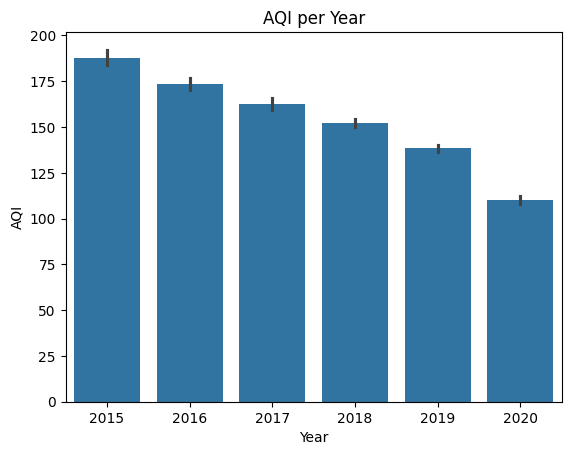

In [33]:
plt.title('AQI per Year')
sns.barplot(x='Year',y='AQI',data=df_full); 

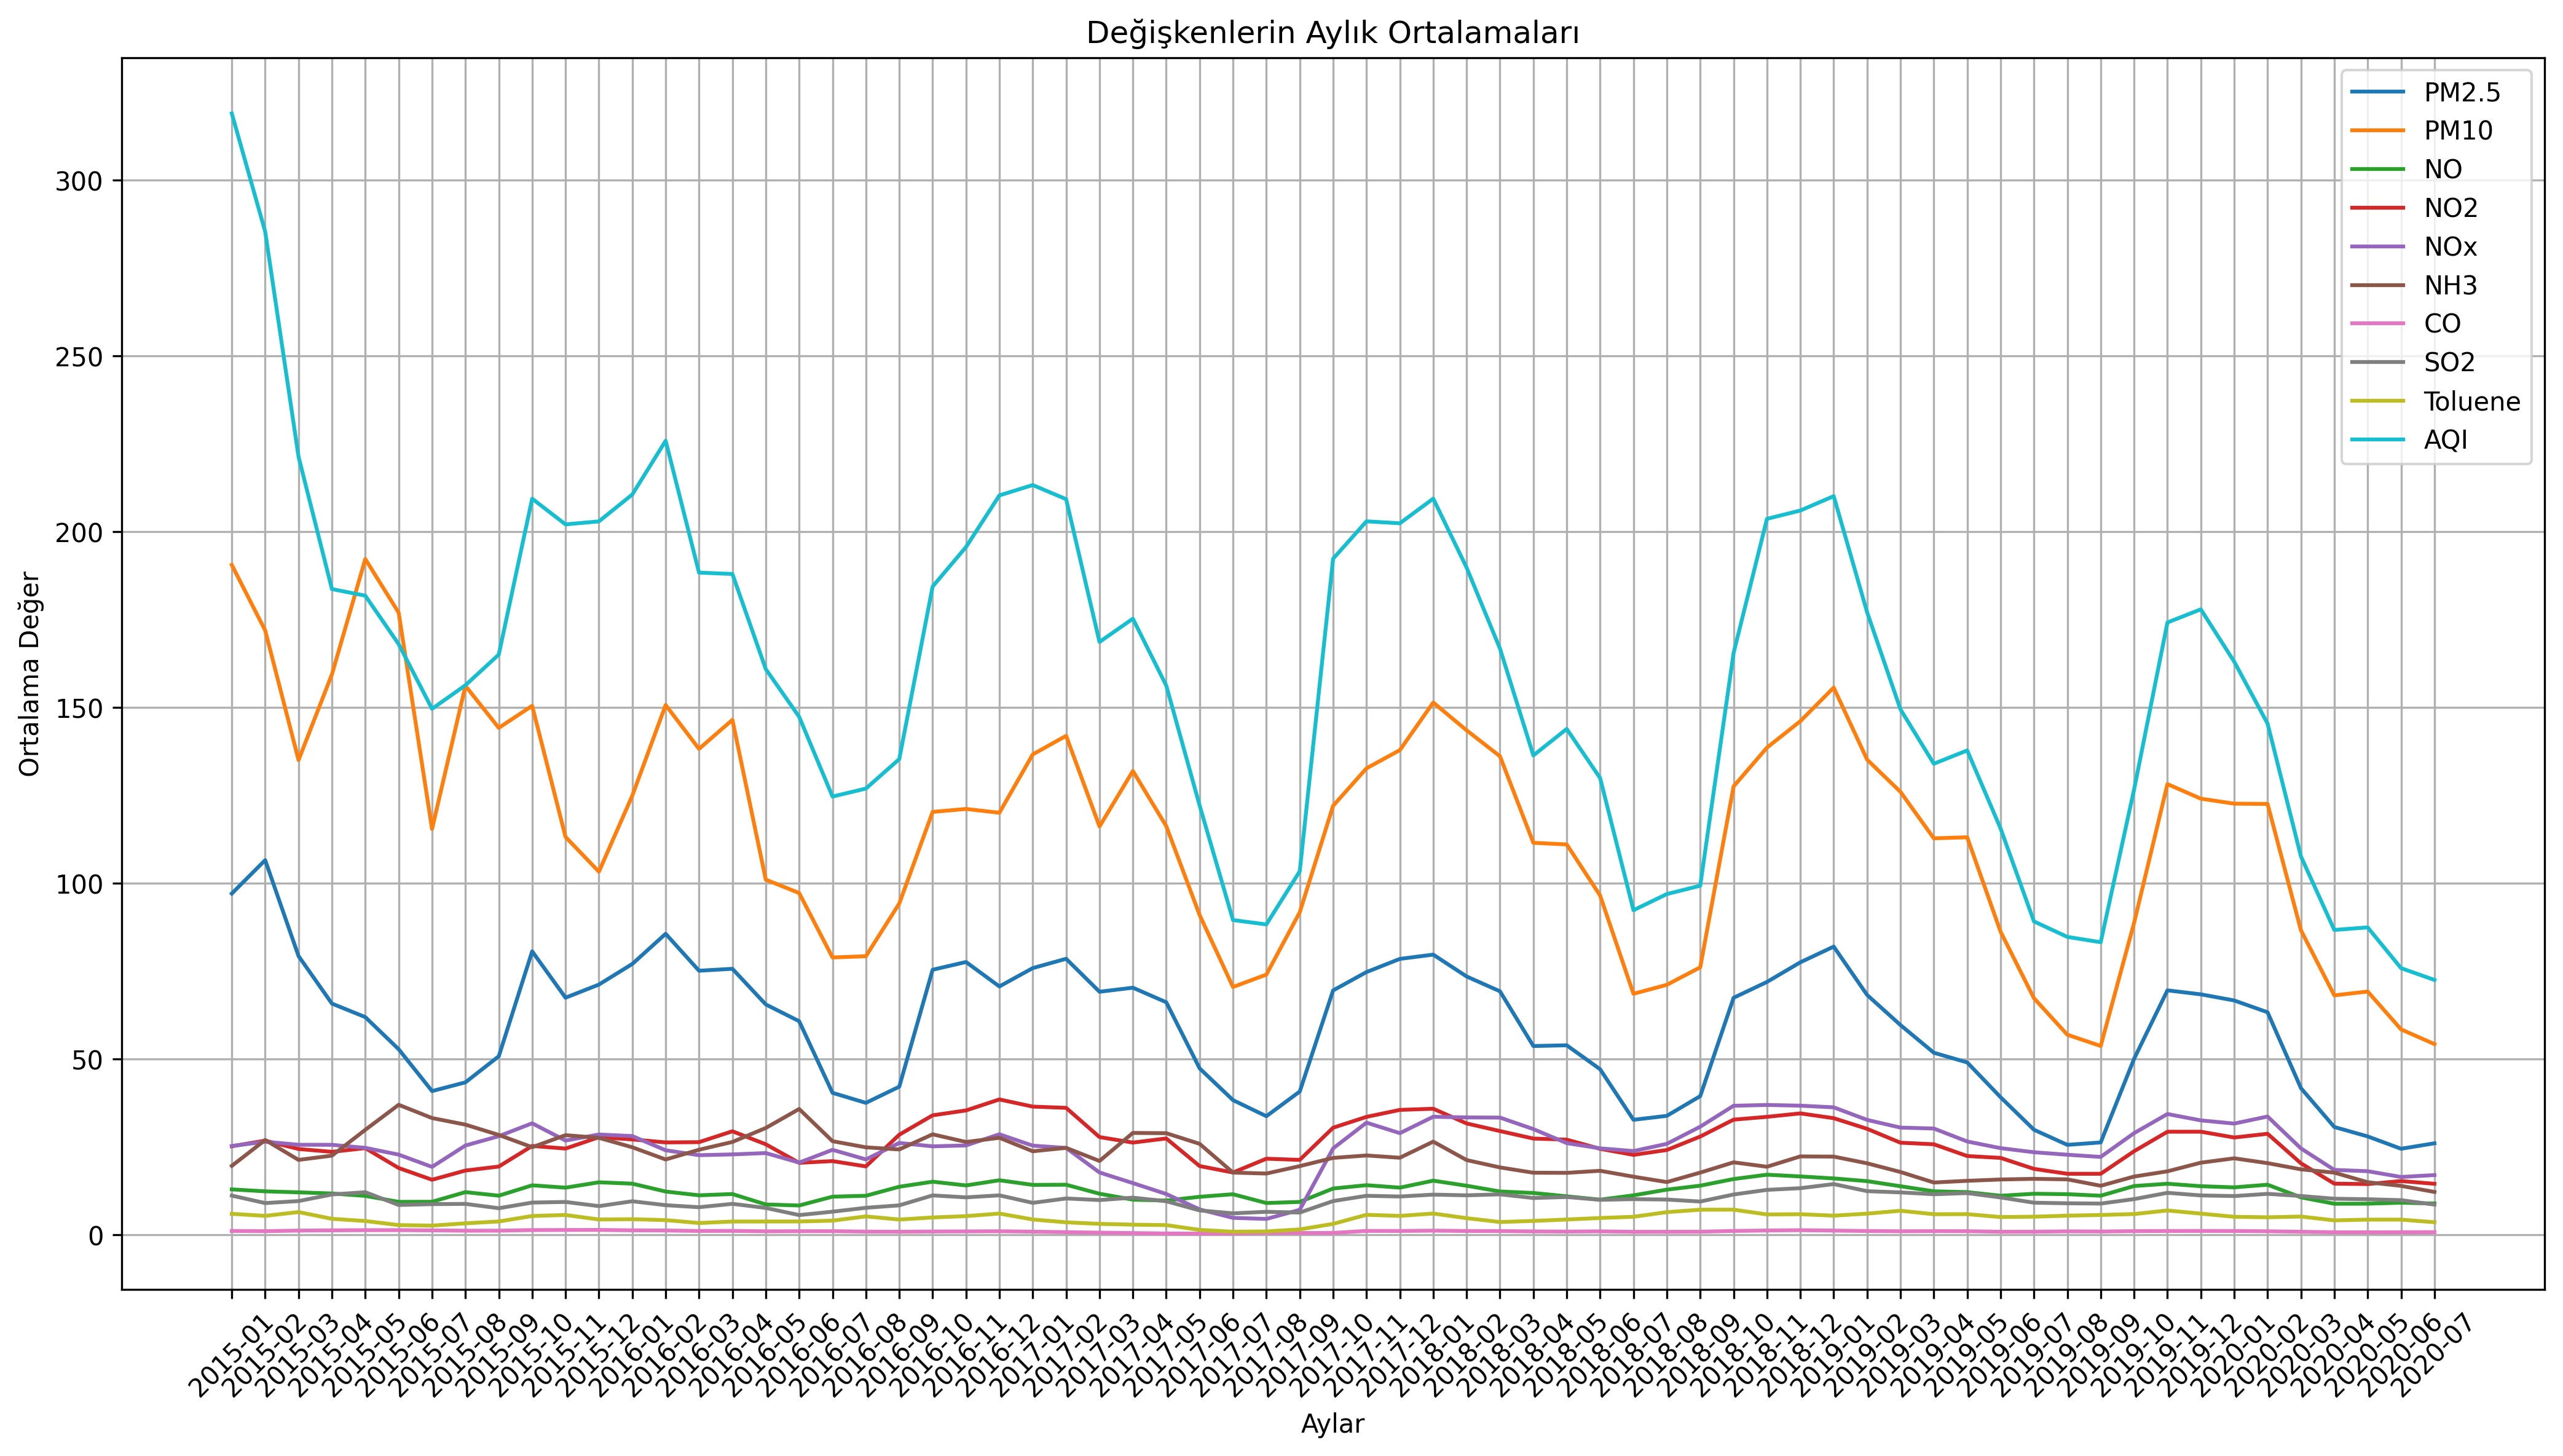

In [34]:
numerical_cols = df_city_day.select_dtypes(include='number').columns.tolist()
df_city_day['Month'] = df_city_day['Date'].dt.to_period('M')
monthly_data = df_city_day.groupby('Month')[numerical_cols].mean(numeric_only=True)

plt.figure(figsize=(14, 8), dpi=300)
for col in numerical_cols:
    plt.plot(monthly_data.index.astype(str), monthly_data[col], label=col)

plt.xlabel('Aylar')
plt.ylabel('Ortalama Değer')
plt.title('Değişkenlerin Aylık Ortalamaları')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

The line graph above is a graph showing the monthly averages of numerical values ​​such as AQI, PM10, PM2.5, NO, NO2. According to the fluctuations seen here, it can be said that the values ​​​​change according to certain seasonality.

When we look at the seasonal intervals of India, it is seen that December and January coincide with the winter season. It can be said that the AQI value increases as a result of the increase in the use of fuels such as coal, wood, heating devices and vehicles in the winter months.

The fact that June and July coincide with the Monsoon period provides an opportunity for the air to disperse and clean due to the increase in rainfall and winds. For this reason, it can be said that the AQI value decreases and air quality increases.

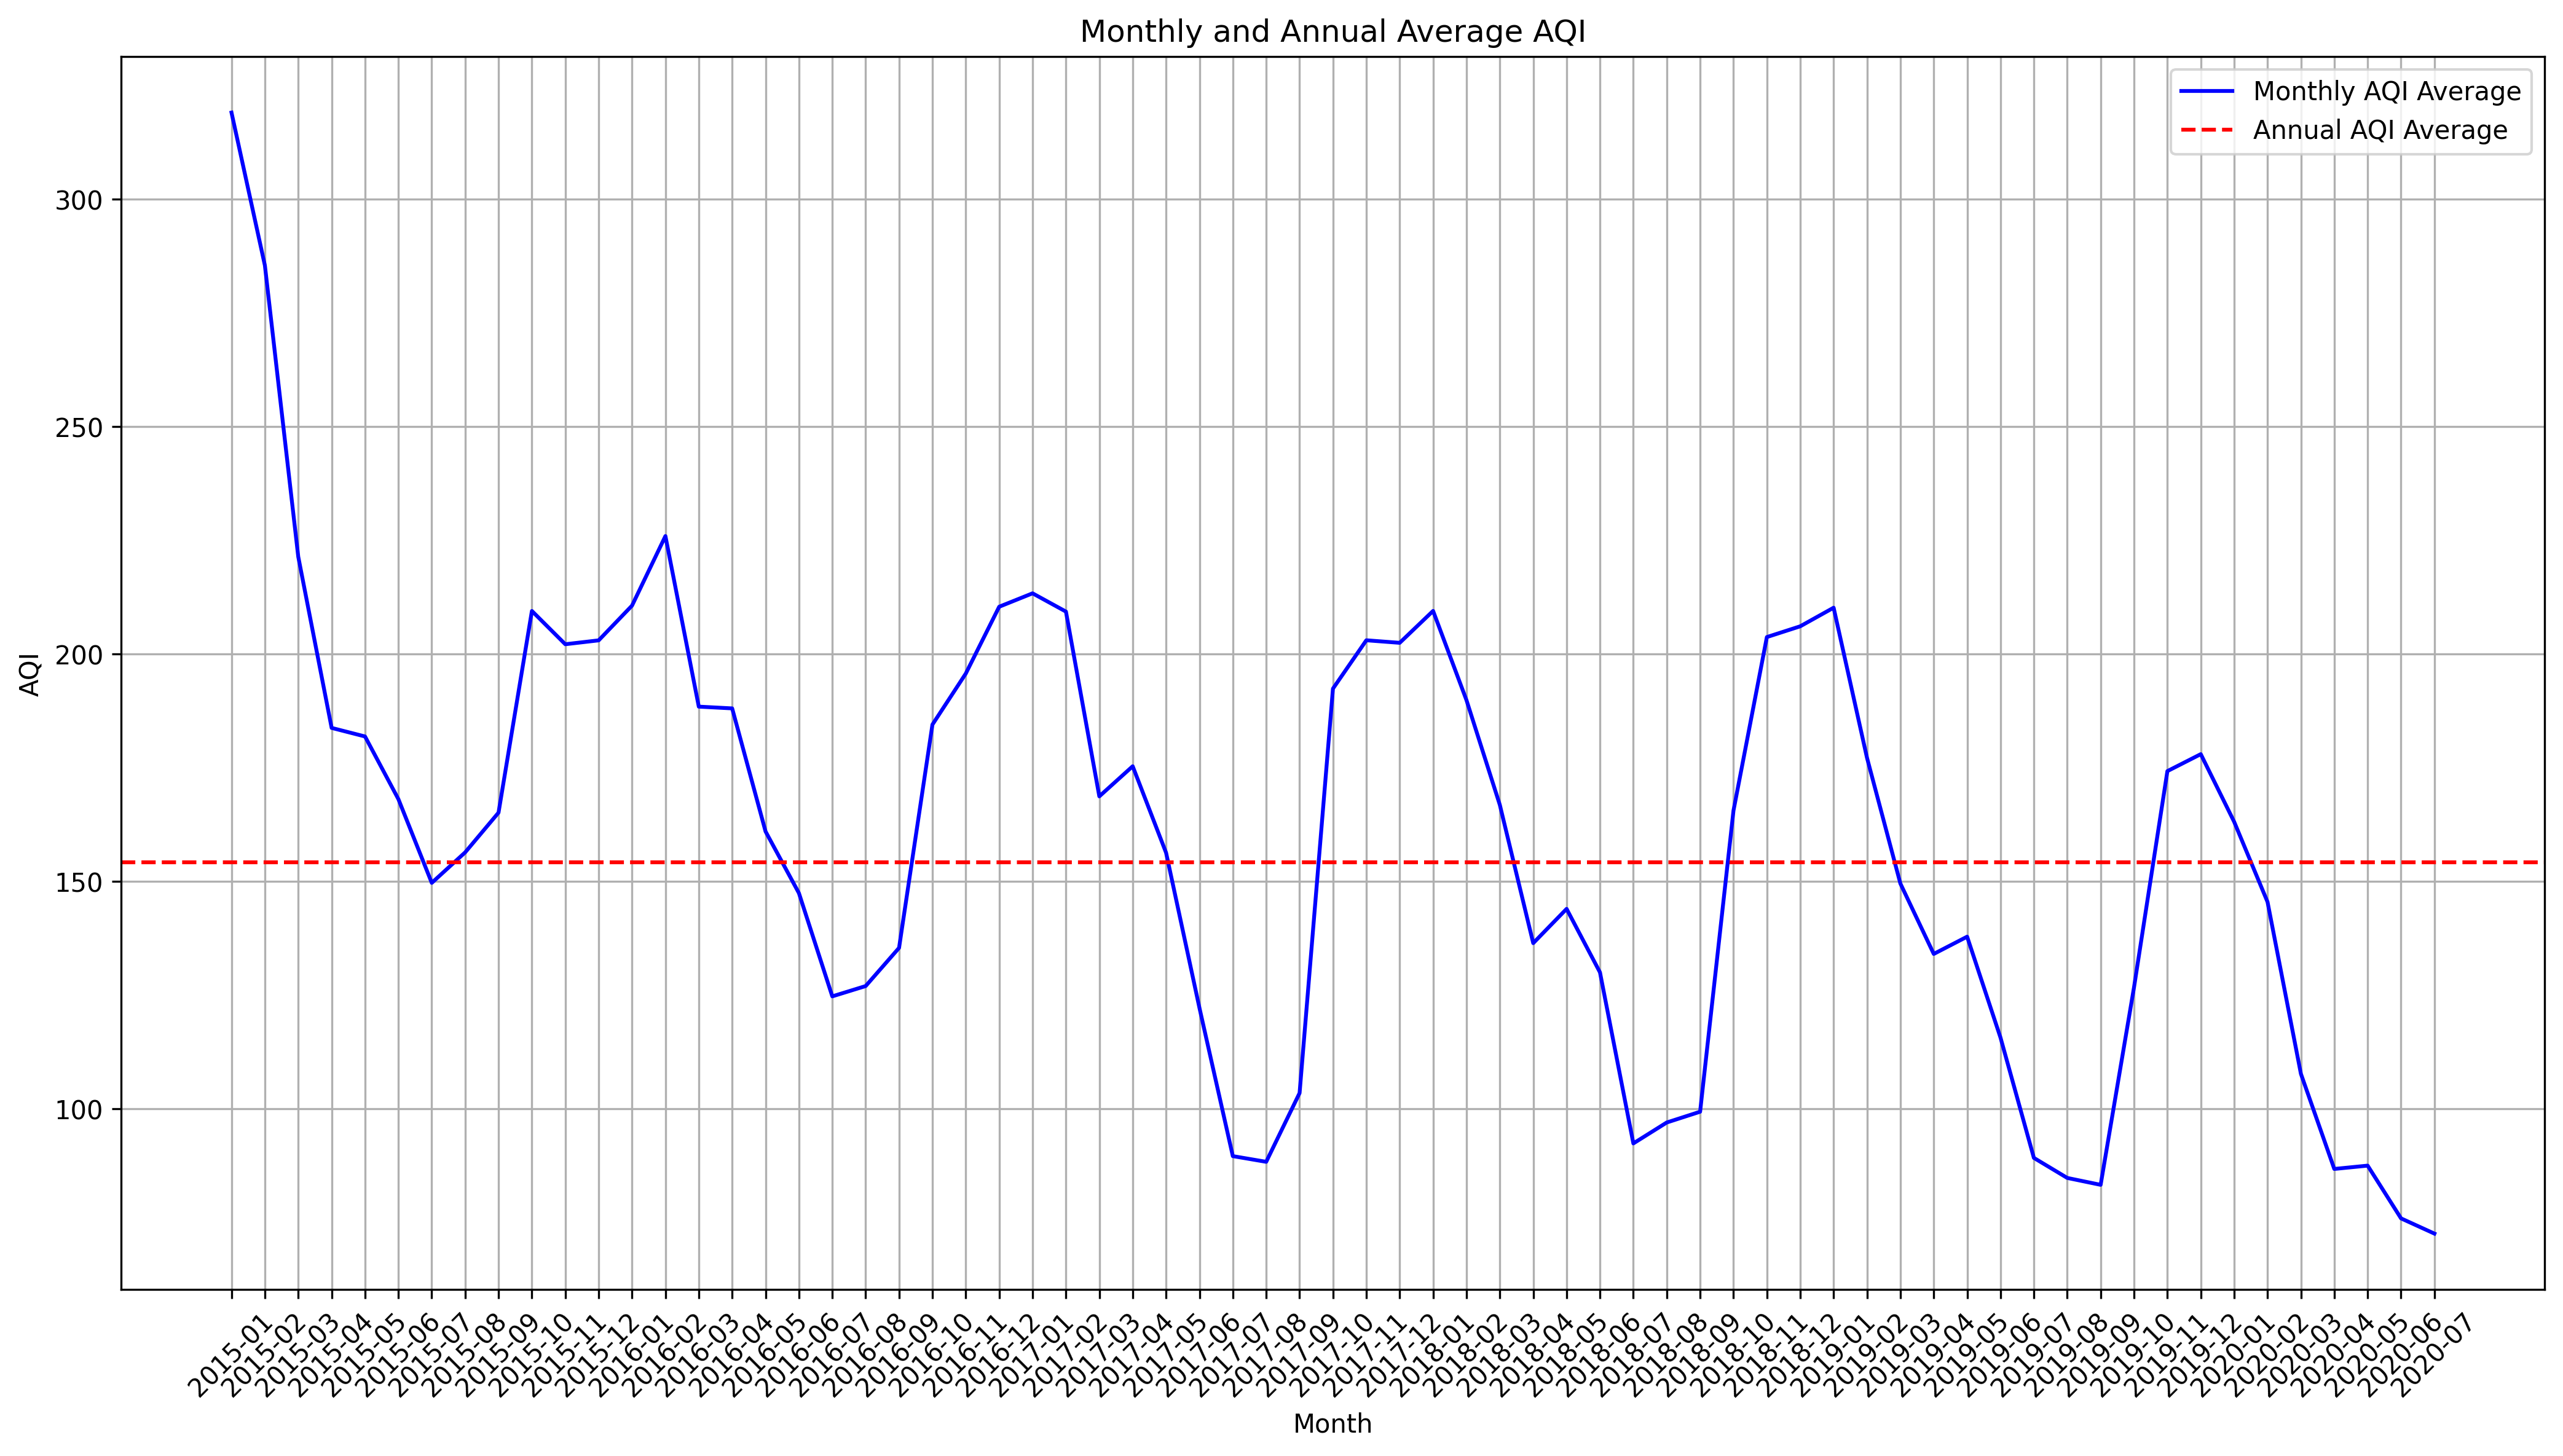

In [35]:
df_city_day['Month'] = df_city_day['Date'].dt.to_period('M')
df_city_day['Year'] = df_city_day['Date'].dt.year

monthly_aqi = df_city_day.groupby('Month')['AQI'].mean()

annual_aqi_mean = df_city_day.groupby('Year')['AQI'].mean()

plt.figure(figsize=(14, 8), dpi=300)

plt.plot(monthly_aqi.index.astype(str), monthly_aqi, label='Monthly AQI Average', color='blue')

plt.axhline(y=annual_aqi_mean.mean(), color='red', linestyle='--', label='Annual AQI Average')

plt.xlabel('Month')
plt.ylabel('AQI')
plt.title('Monthly and Annual Average AQI')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The graph here is a line graph showing the monthly averages of the AQI value. When the graph is examined, the AQI value reaches the highest level in December-January and the lowest level in June-July. It can be seen from this graph that seasonality is effective.

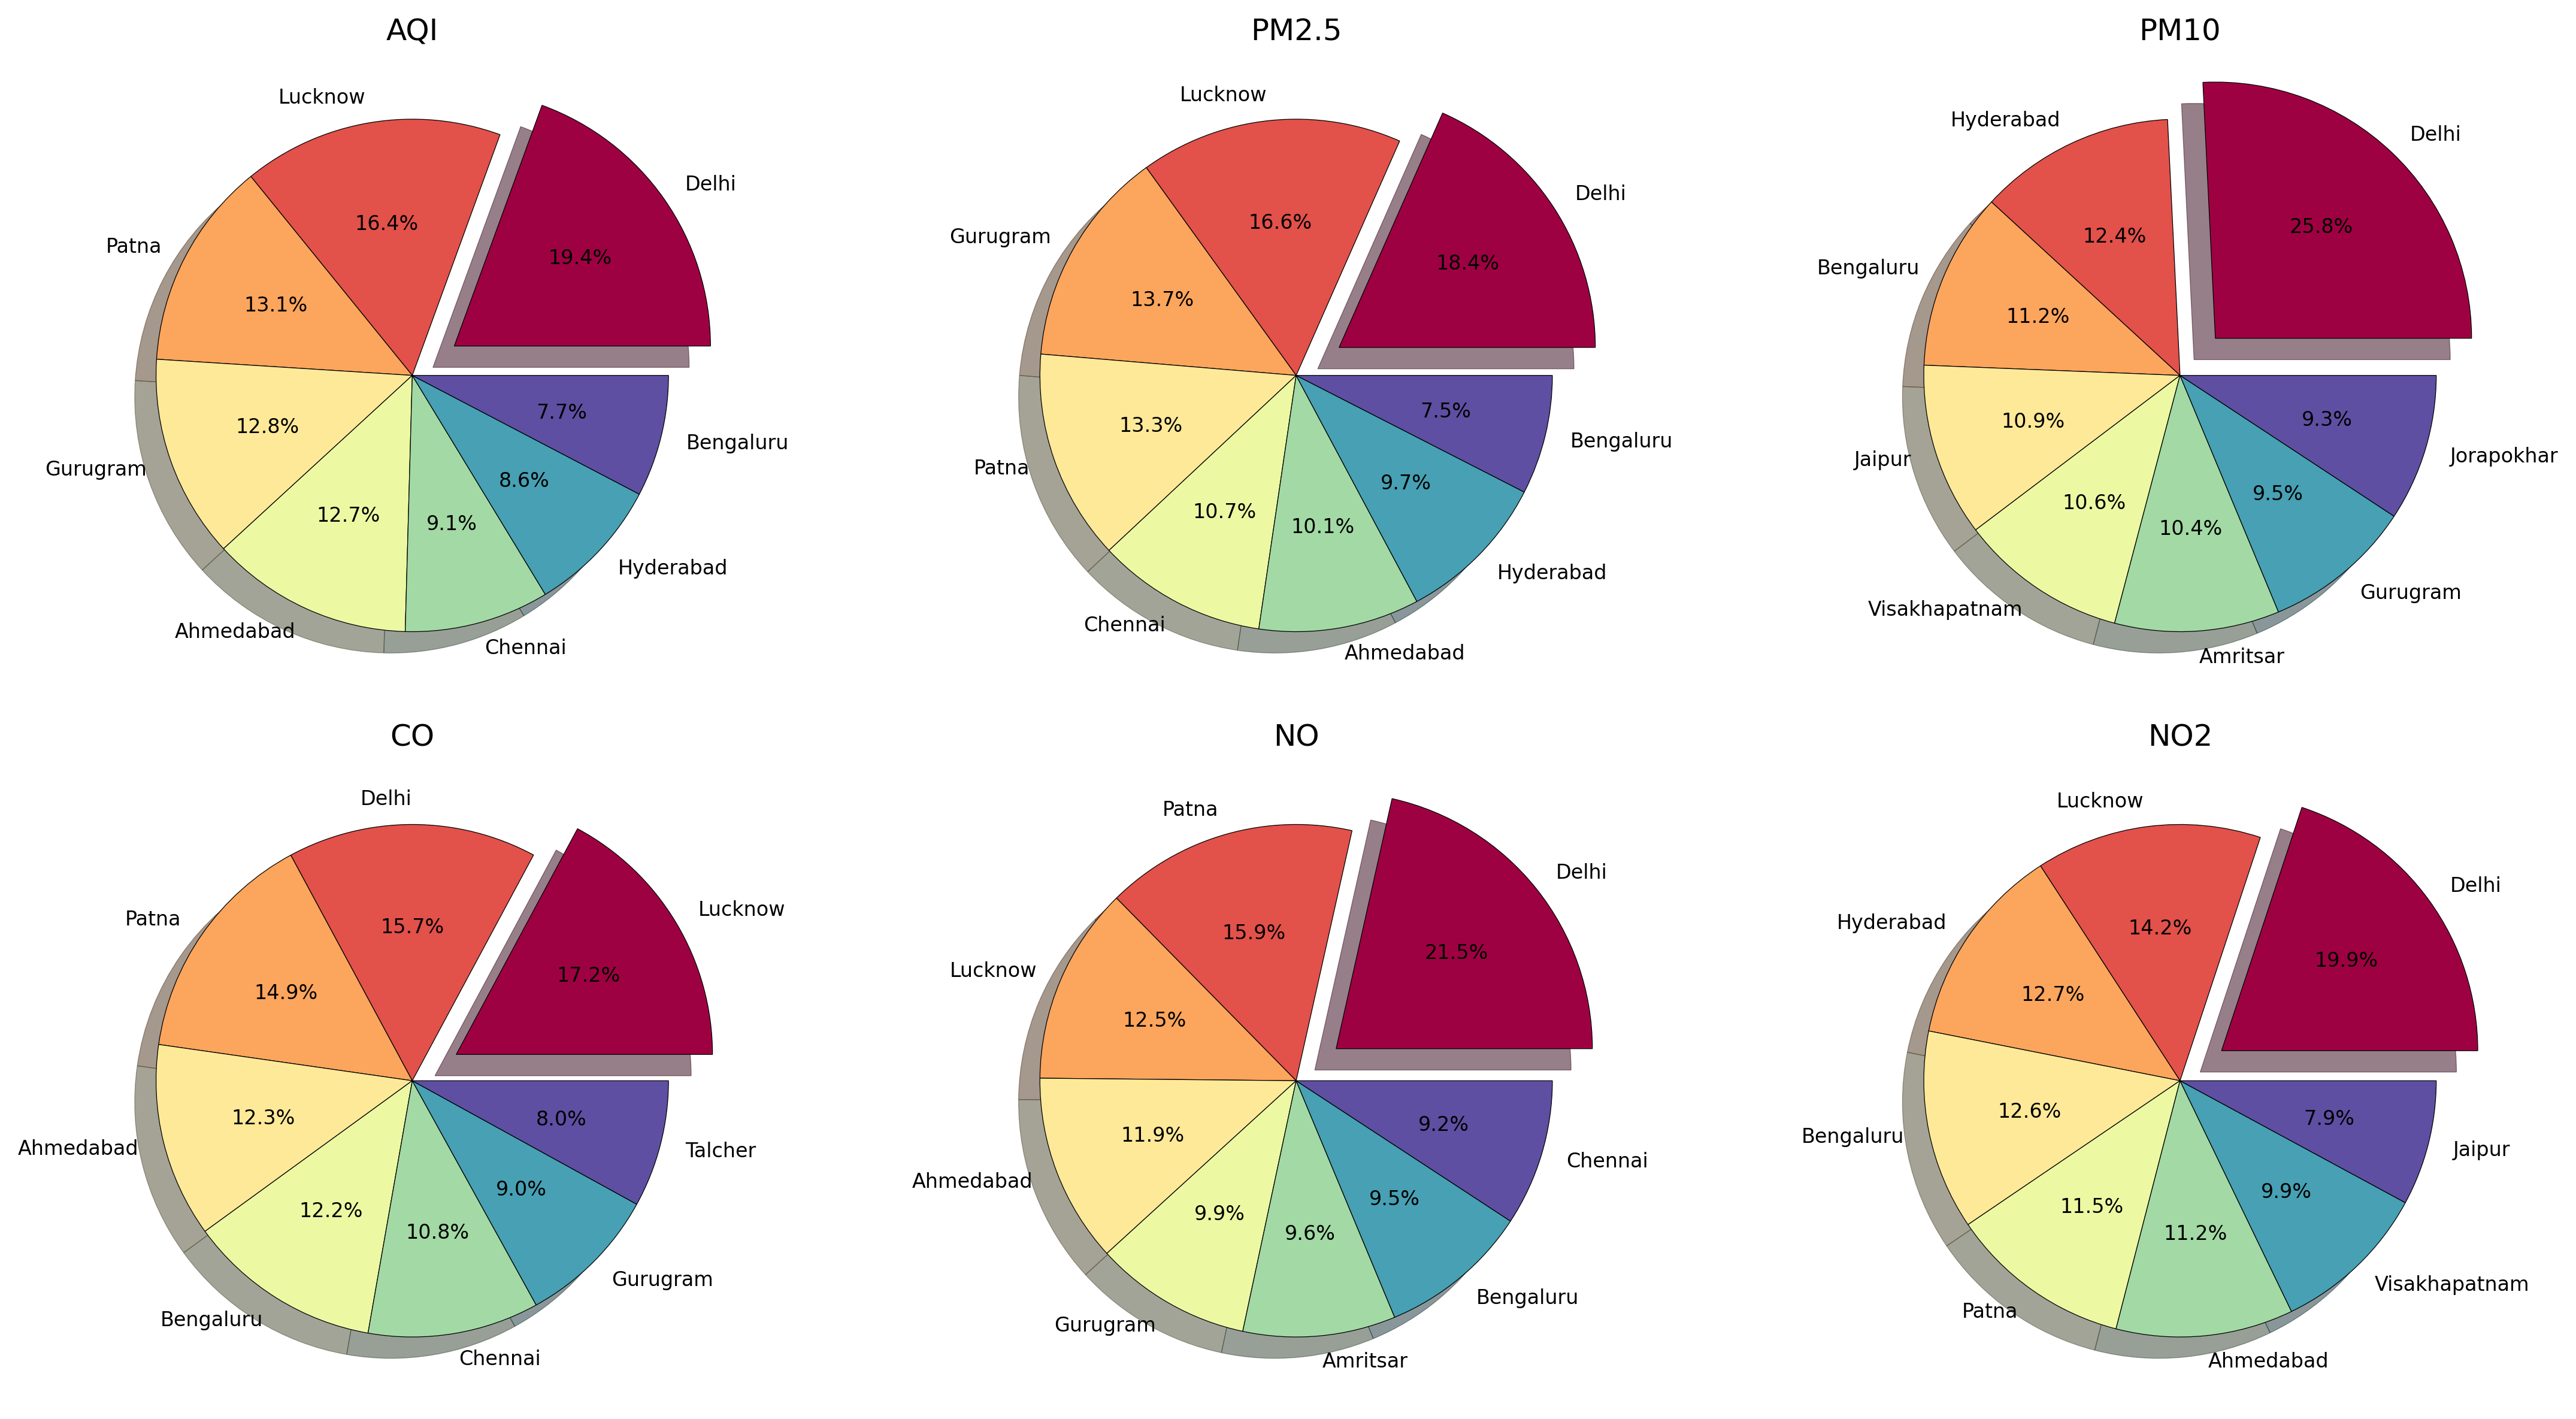

In [36]:
cols = ['AQI', 'PM2.5', 'PM10', 'CO', 'NO', 'NO2']

cmap = plt.get_cmap('Spectral')
color = [cmap(i) for i in np.linspace(0, 1, 8)]
explode = [0.2, 0, 0, 0, 0, 0, 0, 0]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), dpi=300)

axes = axes.flatten()

for ax, col in zip(axes, cols):
   
    x = df_city_day.groupby('City')[col].sum().sort_values(ascending=False)
    x = x.reset_index('City')
    
    top_cities = x[:8]
    sizes = top_cities[col].values 
    labels = top_cities['City'].tolist()  
    
 
    wedges, texts, autotexts = ax.pie(sizes, shadow=True, autopct='%1.1f%%', 
                                      colors=color, explode=explode,
                                      wedgeprops={'edgecolor': 'black', 'linewidth': 0.3},
                                      labels=labels)

    for text in texts:
        text.set_fontsize(8)  
    
    for autotext in autotexts:
        autotext.set_fontsize(8) 
    
    ax.set_title(f'{col}') 

for i in range(len(cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In the pie charts above, the distribution of the top eight cities with high air pollution and the AQI value, as well as the independent variables that affect the AQI value the most, is shown separately by city. When the chart is examined in general, it is seen that the highest pollution belongs to Delhi in almost all charts. Since the other distributions are similar to each other, it can be said that the variables affect the AQI value linearly.

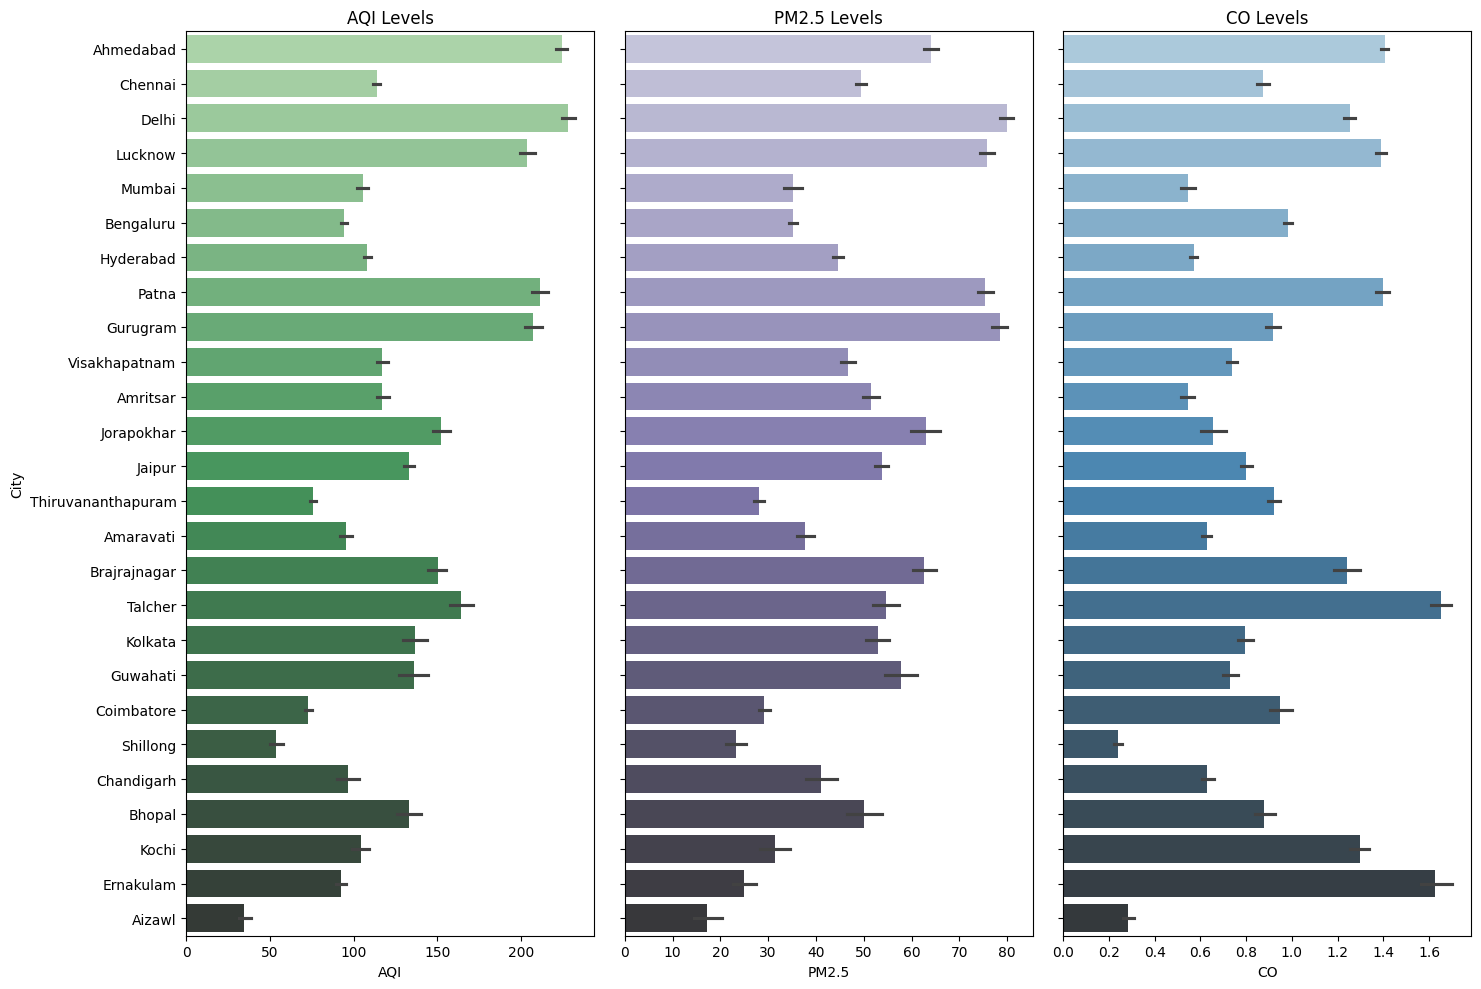

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(15, 10), sharey=True)

sns.barplot(ax=axes[0], y='City', x='AQI', data=df_city_day, palette='Greens_d')
axes[0].set_title('AQI Levels')

sns.barplot(ax=axes[1], y='City', x='PM2.5', data=df_city_day, palette='Purples_d')
axes[1].set_title('PM2.5 Levels')

sns.barplot(ax=axes[2], y='City', x='CO', data=df_city_day, palette='Blues_d')
axes[2].set_title('CO Levels')

plt.tight_layout()
plt.show()

In the line graphs here, the values ​​of the variables PM2.5 and CO, which are the two values ​​that affect the AQI and AQI values ​​of the cities in the data, are seen. In general, the length of the AQI bar increases according to PM2.5 and CO. Although some cities have lower CO values, higher PM2.5 values ​​have caused the AQI value to increase. From here, the superiority of the PM2.5 value over CO can be seen.

**PREPARING THE DATA**
- Determining the numerical and categorical columns of the data set, filling the empty values ​​with scaler, applying onehotencoding to categorical data, separating the data set into training, test and validation data sets, determining the input and target columns of the data sets we separated

In [38]:

numeric_cols = df_full.select_dtypes(include=np.number).columns.tolist() 
numeric_cols

['PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'Toluene',
 'AQI',
 'Year']

In [39]:
categorical_cols = df_full.select_dtypes(include=['object']).columns.tolist() # df_city_day'deki kategorik sütunların isimlerini bir liste olarak categorical_cols'a atadık.
categorical_cols

['City']

In [40]:
full_columns=df_full.columns
full_columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'Toluene', 'AQI', 'Year'],
      dtype='object')

In [41]:

input_cols = [full_columns[0]]+list(full_columns[2:-2])+ [full_columns[-1]] 

target_col = 'AQI' 

In [42]:
input_cols

['City',
 'PM2.5',
 'PM10',
 'NO',
 'NO2',
 'NOx',
 'NH3',
 'CO',
 'SO2',
 'Toluene',
 'Year']

In [43]:
from sklearn.model_selection import train_test_split
train_and_val_df, test_df = train_test_split(df_full, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(df_full, test_size=0.2) 
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (19880, 13)
val_df.shape : (4970, 13)
test_df.shape : (4970, 13)


In [44]:
train_df.head(2)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,Year
15189,Hyderabad,2016-09-03,10.40,30.27,13.23,57.09,17.23,15.31,0.45,10.59,0.49,78.0,2016
13592,Gurugram,2019-03-03,31.97,54.32,11.76,21.15,17.69,NaN,0.41,17.31,0.00,104.0,2019


In [45]:
val_df.head(2)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,Year
12814,Gurugram,2017-01-14,80.59,NaN,3.02,10.77,NaN,NaN,1.45,8.33,9.15,208.0,2017
12091,Delhi,2020-02-06,118.57,205.43,33.37,51.82,60.54,36.16,1.18,12.08,9.15,277.0,2020


In [46]:
test_df.head(2)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,AQI,Year
11286,Delhi,2017-11-23,80.59,251.23,34.73,55.04,70.15,40.03,1.55,18.32,11.97,340.0,2017
27868,Thiruvananthapuram,2019-12-14,17.89,42.06,8.57,14.27,14.52,9.53,1.30,8.33,NaN,78.0,2019


In [47]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy() 
val_inputs = val_df[input_cols].copy() 
val_target = val_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_target = test_df[target_col].copy() 

In [48]:
train_inputs.head(2)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,Year
15189,Hyderabad,10.40,30.27,13.23,57.09,17.23,15.31,0.45,10.59,0.49,2016
13592,Gurugram,31.97,54.32,11.76,21.15,17.69,NaN,0.41,17.31,0.00,2019


In [49]:
train_target

15189     78.0
13592    104.0
28738     65.0
3222     102.0
18576    168.0
         ...  
7800      77.0
12815    208.0
5573      63.0
4384     151.0
23160     62.0
Name: AQI, Length: 19880, dtype: float64

In [50]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist() 

In [51]:
from sklearn.impute import SimpleImputer
imputer =  SimpleImputer(strategy = 'mean') 
imputer.fit(df_full[numeric_cols]) 

SimpleImputer()

In [52]:

train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [53]:
train_inputs[numeric_cols].isna().sum() 

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
Toluene    0
Year       0
dtype: int64

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler = StandardScaler().fit(train_inputs[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [56]:
test_inputs.describe().T

,count,mean,std,min,25%,50%,75%,max
PM2.5,4970.0,0.002496,0.996219,-1.699748,-0.783274,-0.155222,0.760867,3.167654
PM10,4970.0,0.000976,1.003805,-2.062945,-0.665674,-0.000638,0.369413,3.601163
NO,4970.0,-0.012302,1.003051,-1.412035,-0.761511,-0.309633,0.719050,3.241800
NO2,4970.0,-0.003456,0.998870,-1.553616,-0.835898,-0.192463,0.705550,3.038096
NOx,4970.0,-0.004332,0.997199,-1.569426,-0.748622,-0.068026,0.637544,3.166118
NH3,4970.0,0.013660,1.005525,-1.676622,-0.736868,-0.001490,0.435721,3.537034
CO,4970.0,0.005837,1.006400,-1.750530,-0.701390,-0.096285,0.774371,3.229620
SO2,4970.0,-0.006534,1.008876,-1.777965,-0.787819,-0.189570,0.805779,3.337500
Toluene,4970.0,-0.011543,1.004511,-1.194966,-0.835823,-0.004797,0.451487,3.823885
Year,4970.0,-0.013312,1.003060,-2.089282,-0.735625,-0.058797,0.618031,1.294860


In [57]:
df_full[categorical_cols].nunique()

City    26
dtype: int64

In [58]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore') 
encoder.fit(df_full[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [59]:
encoder.categories_


[array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
        'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
        'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
        'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
        'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
        'Visakhapatnam'], dtype=object)]

In [60]:

encoded_cols = list(encoder.get_feature_names_out(categorical_cols)) 
encoded_cols

['City_Ahmedabad',
 'City_Aizawl',
 'City_Amaravati',
 'City_Amritsar',
 'City_Bengaluru',
 'City_Bhopal',
 'City_Brajrajnagar',
 'City_Chandigarh',
 'City_Chennai',
 'City_Coimbatore',
 'City_Delhi',
 'City_Ernakulam',
 'City_Gurugram',
 'City_Guwahati',
 'City_Hyderabad',
 'City_Jaipur',
 'City_Jorapokhar',
 'City_Kochi',
 'City_Kolkata',
 'City_Lucknow',
 'City_Mumbai',
 'City_Patna',
 'City_Shillong',
 'City_Talcher',
 'City_Thiruvananthapuram',
 'City_Visakhapatnam']

In [61]:
train_inputs.head(2)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,Year
15189,Hyderabad,-1.383872,-1.470600,0.073591,1.876635,-0.562846,-0.39361,-0.966940,0.051464,-1.082877,-1.412453
13592,Gurugram,-0.718495,-0.999505,-0.091854,-0.285091,-0.535972,-0.00149,-1.036593,1.216750,-1.194966,0.618031


In [62]:

train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols]) 
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [63]:
pd.set_option('display.max_columns', None) 

In [64]:
test_inputs.head(2)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,Toluene,Year,City_Ahmedabad,City_Aizawl,City_Amaravati,City_Amritsar,City_Bengaluru,City_Bhopal,City_Brajrajnagar,City_Chandigarh,City_Chennai,City_Coimbatore,City_Delhi,City_Ernakulam,City_Gurugram,City_Guwahati,City_Hyderabad,City_Jaipur,City_Jorapokhar,City_Kochi,City_Kolkata,City_Lucknow,City_Mumbai,City_Patna,City_Shillong,City_Talcher,City_Thiruvananthapuram,City_Visakhapatnam
11286,Delhi,0.781303,2.857597,2.49336,1.753331,2.528753,1.686131,0.948502,1.391890,1.543213,-0.735625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27868,Thiruvananthapuram,-1.152825,-1.239655,-0.45088,-0.698911,-0.721165,-0.879893,0.513174,-0.340432,-0.004797,0.618031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**DATA MODELING**

In [65]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

In [66]:

X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

**Fixed/Random Prediction**

- Let's define two models that always return the average and random values ​​as predictions.
- We can determine the minimum score that the models we will create with dumb models should achieve.

In [67]:

def guess_mean(inputs):
    return np.full(len(inputs), df_full.AQI.mean())

In [68]:
guess_mean_train_r2_score=r2_score(guess_mean(X_train), train_target)
print("The error was calculated by assigning average values ​​to the prediction train_r2score: ", guess_mean_train_r2_score)
guess_mean_val_r2_score=r2_score(guess_mean(X_val), val_target)
print("The error was calculated by assigning average values ​​to the prediction val_r2score : ", guess_mean_val_r2_score)
guess_mean_test_r2_score=r2_score(guess_mean(X_test), test_target)
print("The error was calculated by assigning average values ​​to the prediction test_r2score: ", guess_mean_test_r2_score)

The error was calculated by assigning average values ​​to the prediction train_r2score:  -9.504434444921255e+30
The error was calculated by assigning average values ​​to the prediction val_r2score :  0.0
The error was calculated by assigning average values ​​to the prediction test_r2score:  0.0


In [69]:

def guess_random(inputs):
    lo, hi = df_full.AQI.min(), df_full.AQI.max()
    return np.random.random(len(inputs)) * (hi - lo) + lo

In [70]:
guess_random_train_r2_score=r2_score(guess_random(X_train), train_target)
print("The error was calculated by assigning random values ​​to the prediction train_r2_score: ", guess_random_train_r2_score)
guess_random_val_r2_score=r2_score(guess_random(X_val), val_target)
print("The error was calculated by assigning random values ​​to the prediction val_r2_score : ", guess_random_val_r2_score)
guess_random_test_r2_score=r2_score(guess_random(X_test), test_target)
print("The error was calculated by assigning random values ​​to the prediction test_r2_score : ", guess_random_test_r2_score)

The error was calculated by assigning random values ​​to the prediction train_r2_score:  -0.8989103021788667
The error was calculated by assigning random values ​​to the prediction val_r2_score :  -0.9178866863295372
The error was calculated by assigning random values ​​to the prediction test_r2_score :  -0.9120444252955175


- The R² score for the train data indicates that the model’s ability to explain the variability in the air quality data is very low. This means that the model is not learning the relationships between air pollution and other air quality factors effectively.

- If the R² scores for the training, validation, and test sets are all about the same negative value, it indicates that the model performed poorly on all three data sets, meaning that it was not overfitting or underfitting, but rather that the model was simply wrong.

In [71]:
results = []

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'SGDRegressor' : SGDRegressor(),
    'ElasticNet':ElasticNet(),
    'Lasso' : Lasso(),
    'SVR' :SVR(kernel='linear'),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42)
}


In [72]:
def try_model(model,name):
    model.fit(X_train, train_target)
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    test_preds=model.predict(X_test)
    
    
    train_r2_score = r2_score(train_target, train_preds) 
    val_r2_score= r2_score(val_target, val_preds)
    test_r2_score = r2_score(test_target, test_preds)

    print(f"{name} Model:")
    print("Train r2_score : ", train_r2_score)
    print("Validation r2_score : ", val_r2_score)
    print("Test r2_score : ", test_r2_score)
    print("-" * 40)
    results.append({'Model': name, 'Train R2 Score': train_r2_score, 'Validation R2 Score': val_r2_score, 'Test R2 Score': test_r2_score}) 

In [73]:

for name, model in models.items():
    try_model(model,name)

LinearRegression Model:
Train r2_score :  0.709617185207784
Validation r2_score :  0.7008674277686546
Test r2_score :  0.7062403446399648
----------------------------------------
Ridge Model:
Train r2_score :  0.7096171250121379
Validation r2_score :  0.7008662894137714
Test r2_score :  0.7062395499718669
----------------------------------------
SGDRegressor Model:
Train r2_score :  0.7092922179099278
Validation r2_score :  0.7005421863461887
Test r2_score :  0.7058632384408807
----------------------------------------
ElasticNet Model:
Train r2_score :  0.6431426003698946
Validation r2_score :  0.6326917052629487
Test r2_score :  0.6402428456095768
----------------------------------------
Lasso Model:
Train r2_score :  0.6878989455522554
Validation r2_score :  0.6787293643760733
Test r2_score :  0.6859583039567445
----------------------------------------
SVR Model:
Train r2_score :  0.6859827976462847
Validation r2_score :  0.6808683597616676
Test r2_score :  0.6854025701250499
-------

According to the results obtained, the R² values ​​of the Linear Regression, Ridge, and SGDRegressor models on the training, validation, and test sets are quite close to each other. This similarity shows that the prediction performances of these models on the data are quite close to each other and do not adequately reflect the complexity of our dataset. Therefore, these models do not seem to have sufficient learning and prediction capacity on the data.

The performance of the Lasso and SVR models is characterized by lower R² values ​​compared to the other models. Low values ​​indicate that these models are not suitable for our dataset and their prediction performance is weaker than the other models.

On the other hand, the performance of the GradientBoostingRegressor model is quite impressive. These results show that the learning and prediction capacities of the GradientBoostingRegressor model on the data are much higher than the other models and that it understands the data more effectively.

In [74]:
%%time
from sklearn.tree import DecisionTreeRegressor, plot_tree
tree = DecisionTreeRegressor(random_state=42)
try_model(tree,name="DecisionTreeRegressor") 

DecisionTreeRegressor Model:
Train r2_score :  0.9997900719494776
Validation r2_score :  0.7276034738938275
Test r2_score :  0.9398922197927211
----------------------------------------
CPU times: total: 484 ms
Wall time: 678 ms


- Train R² Score: A nearly perfect R² score (around 1) on the training data indicates that your decision tree model is a very good fit to the data it was trained on, but this is usually a sign of overfitting. The model captured all the variance and patterns in the training data, but this also means that the model can adapt to noise.

- Validation R² Score: The R² score obtained on the validation set indicates that the model performed poorly compared to the training data. This indicates that the model is not resilient to new data due to overfitting. The model has difficulty explaining variances that it has not encountered before on the validation set. While an accuracy of 70.41% is generally a good score for decision trees, it falls short of expectations for the trained model.

- Test R² Score: The R² score obtained on the test set is used to evaluate the performance of the model on new data. An R² score of 93.36% indicates that the model provides adequate overall performance on the data set. While it does indicate overfitting on the training set, its performance on the test set is not too bad. However, the fact that it performs better on the test set compared to the validation set may indicate that the model is still resilient to some new data.

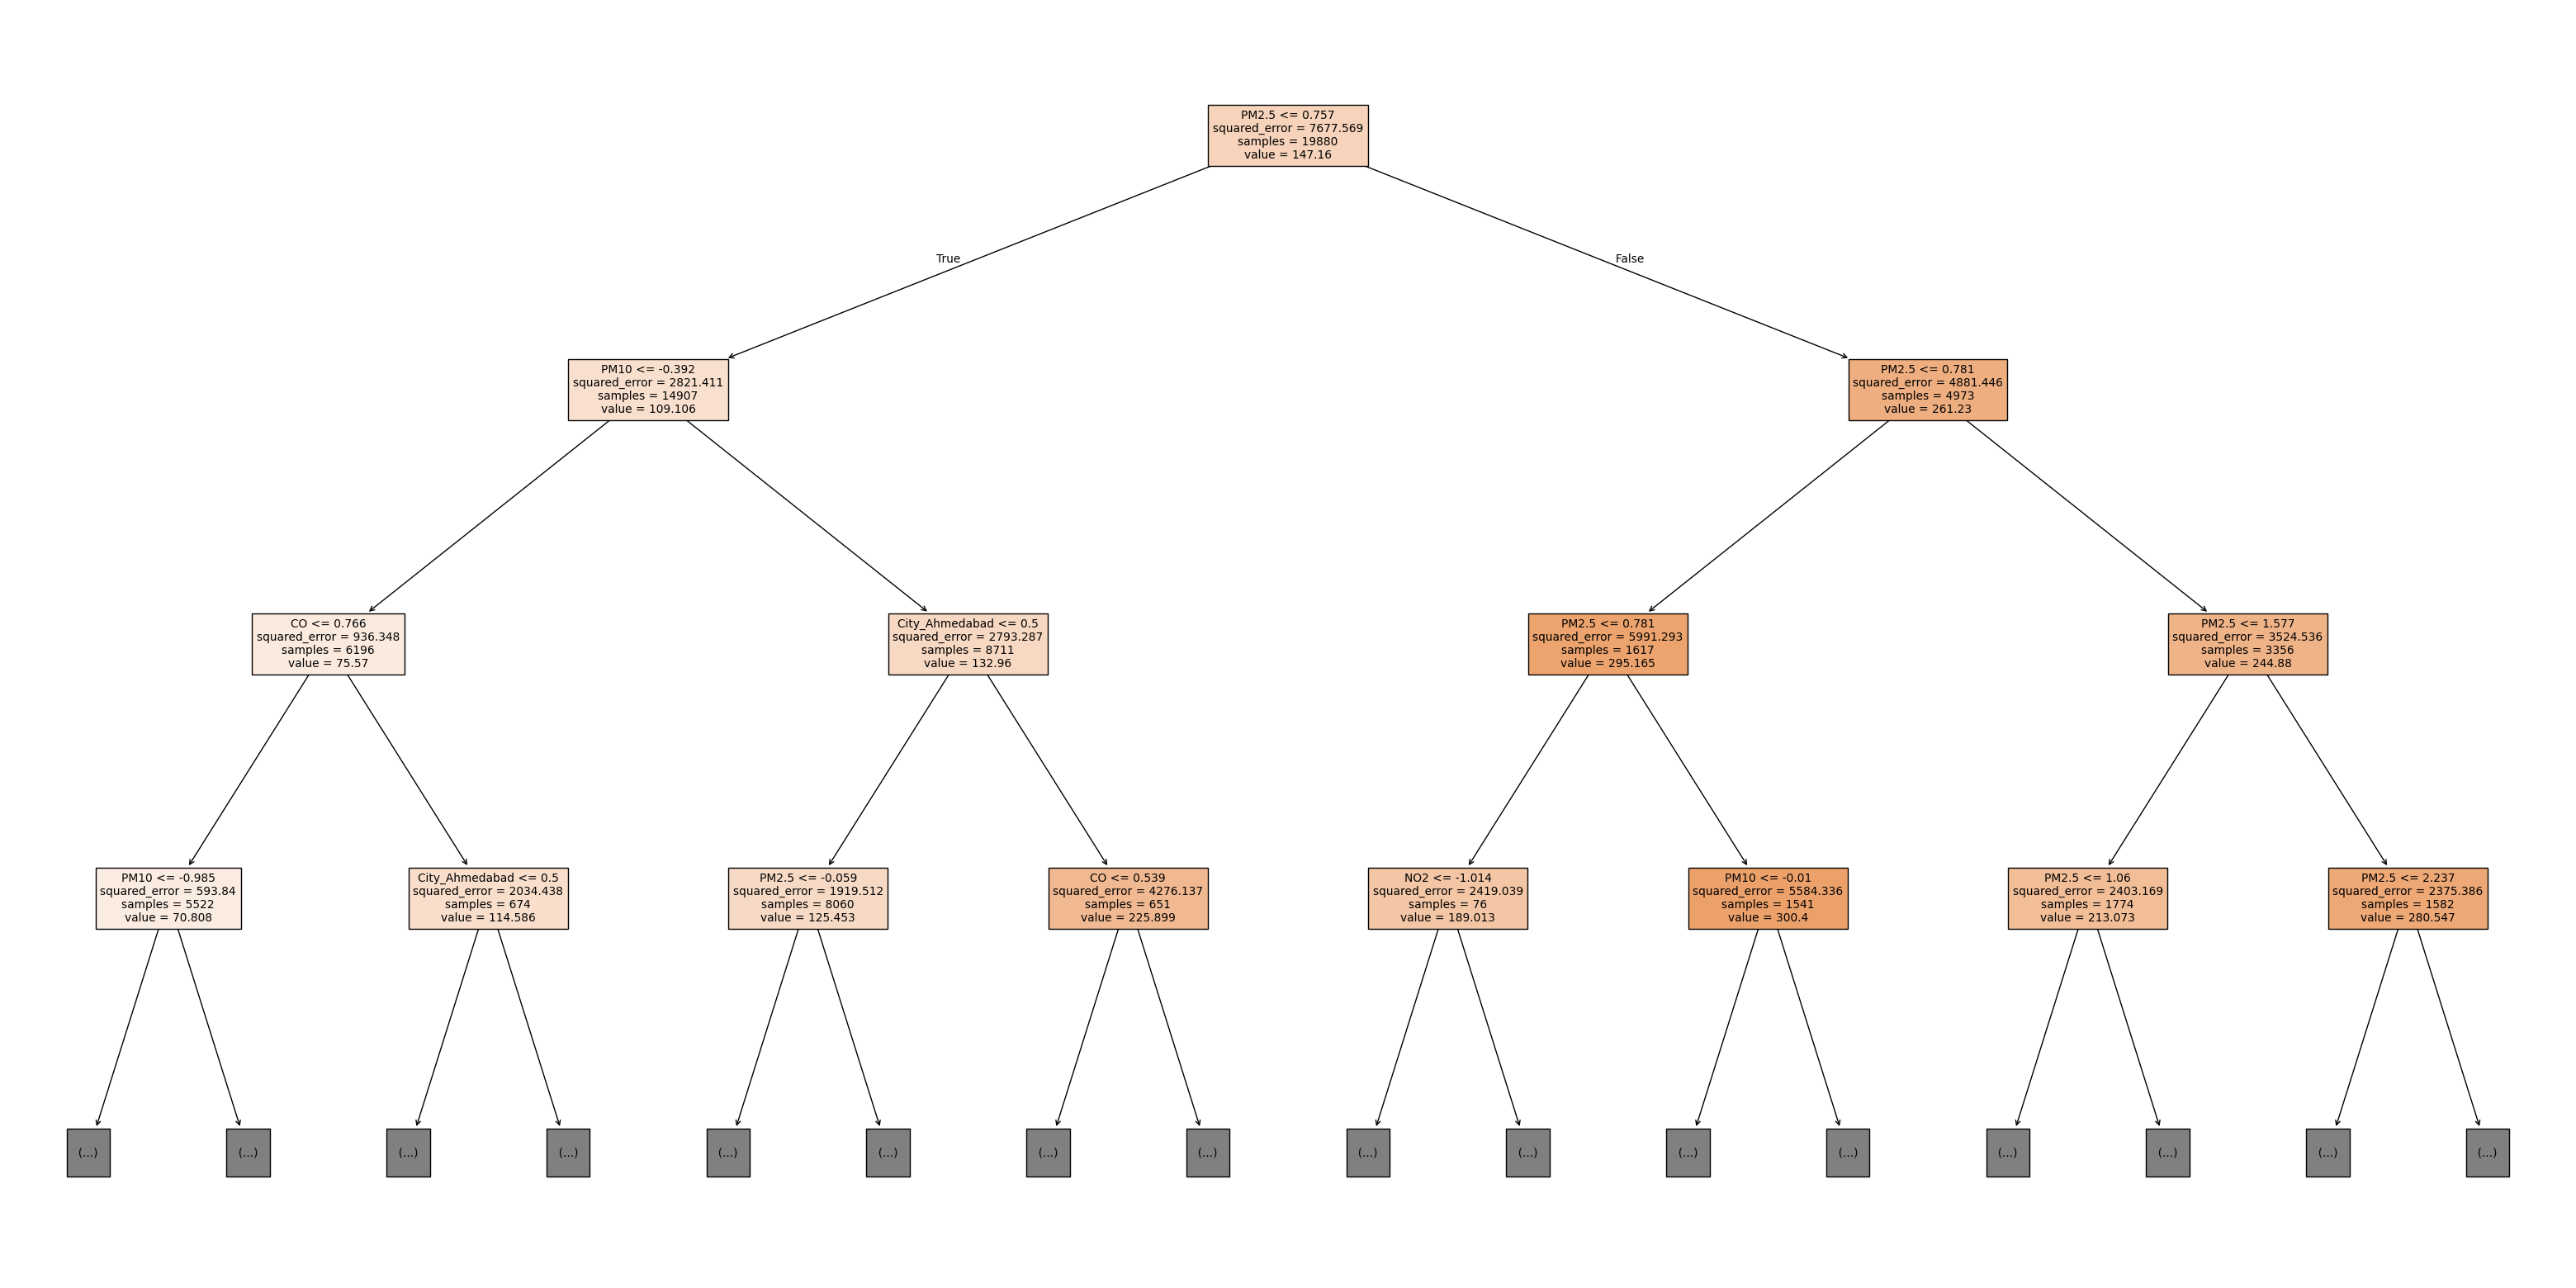

In [75]:
plt.figure(figsize=(40, 20))

plot_tree(tree, max_depth=3, filled=True, feature_names=numeric_cols+encoded_cols);

In [76]:
%%time
rf = RandomForestRegressor(random_state=42, n_jobs=-1) 
try_model(rf,name="RandomForestRegressor")

RandomForestRegressor Model:
Train r2_score :  0.9795625661879586
Validation r2_score :  0.8572534342744837
Test r2_score :  0.9544351988442801
----------------------------------------
CPU times: total: 53.6 s
Wall time: 5.74 s


- The R² score on the training dataset was obtained as 97.91%. This indicates that the model was able to explain a large portion of the variance of the target variable in the training data, i.e. 97.91%. In other words, the model predicted the air quality variables in the training data correctly for the most part and was able to capture a large portion of the data meaningfully.

- The R² score on the validation set was obtained as 84.68%. This indicates that the model successfully explained 84.68% of the target variable in the validation dataset. Despite the high performance on the training data, the model also showed a strong performance on the validation data, indicating that it has good generalization ability and can continue its success on the training data to other data.

- The R² score on the test dataset was obtained as 94.67%. This indicates that the model was able to explain 94.67% of the target variable in the test data. The model has also shown high success on new data that it has not seen before, indicating that the model provides strong accuracy in air quality predictions and is effective on new data.

In [77]:
rf.feature_importances_ 

array([6.60650175e-01, 1.14709270e-01, 2.38159972e-02, 2.09471489e-02,
       1.70568538e-02, 1.24183925e-02, 3.64631845e-02, 2.06425929e-02,
       1.52892489e-02, 1.04347876e-02, 4.79080319e-02, 4.71686594e-06,
       1.41542391e-04, 4.86009477e-04, 1.98218073e-03, 1.79343931e-04,
       2.58005675e-04, 5.35009825e-05, 2.15584127e-03, 2.63778713e-05,
       6.40642713e-03, 2.21995202e-05, 1.15156438e-03, 4.24645467e-04,
       1.32276465e-03, 4.49877547e-04, 3.70153996e-04, 6.60002190e-05,
       3.50306670e-04, 1.14987075e-03, 5.92720785e-05, 1.32912249e-03,
       8.76377577e-06, 9.28108057e-04, 7.44027157e-05, 2.63318265e-04])

In [78]:
importance_df = pd.DataFrame({ 
    'feature': numeric_cols+encoded_cols, 
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
0,PM2.5,0.660650
1,PM10,0.114709
10,City_Ahmedabad,0.047908
6,CO,0.036463
2,NO,0.023816
3,NO2,0.020947
7,SO2,0.020643
4,NOx,0.017057
8,Toluene,0.015289
5,NH3,0.012418


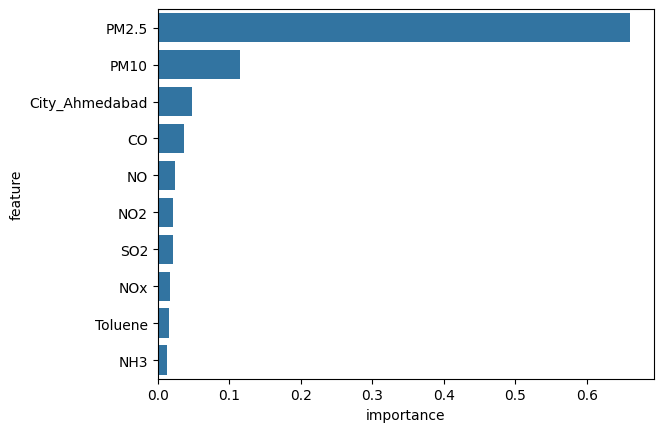

In [79]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

- We found the GradientBoostingRegressor model to be suitable for our data set. We tried to find the best model by optimizing the model hyperparameters using RandomizedSearchCV.

In [80]:
GBR = GradientBoostingRegressor()
param_distributions = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.2], 
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0] 
}

In [81]:

from sklearn.model_selection import RandomizedSearchCV
randomized_search = RandomizedSearchCV(
    estimator=GBR,
    param_distributions=param_distributions,
    n_iter=10,  
    cv=5,       
    verbose=1, 
    n_jobs=-1, 
    random_state=42
)

randomized_search.fit(X_train, train_target)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, verbose=1)

In [82]:
print("Best Hyperparameters :", randomized_search.best_params_)
print("Best Score :", randomized_search.best_score_)

Best Hyperparameters : {'subsample': 0.9, 'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 6, 'learning_rate': 0.1}
Best Score : 0.8528021821245148


In [83]:
best_model = randomized_search.best_estimator_
best_model.fit(X_train, train_target) 
train_preds = best_model.predict(X_train)
val_preds = best_model.predict(X_val)
test_preds=best_model.predict(X_test)

train_r2_score = r2_score(train_target, train_preds) 
val_r2_score= r2_score(val_target, val_preds)
test_r2_score = r2_score(test_target, test_preds) 

print("Train r2_score : ", train_r2_score)
print("Validation r2_score : ", val_r2_score)
print("Test r2_score : ", test_r2_score)

Train r2_score :  0.9309751808119786
Validation r2_score :  0.8569568758681594
Test r2_score :  0.9168043682131942


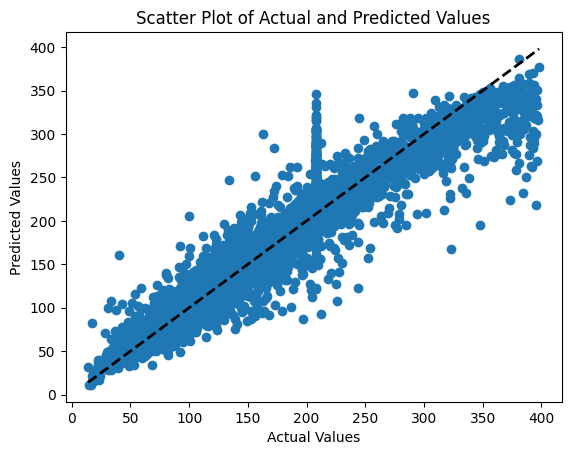

In [84]:
def plot_actual_predict_graph(test_target,test_preds):
    
    plt.scatter(test_target, test_preds)
    plt.plot([min(test_target), max(test_target)], [min(test_target), max(test_target)], 'k--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Scatter Plot of Actual and Predicted Values')
    plt.show()

plot_actual_predict_graph(test_target,test_preds)

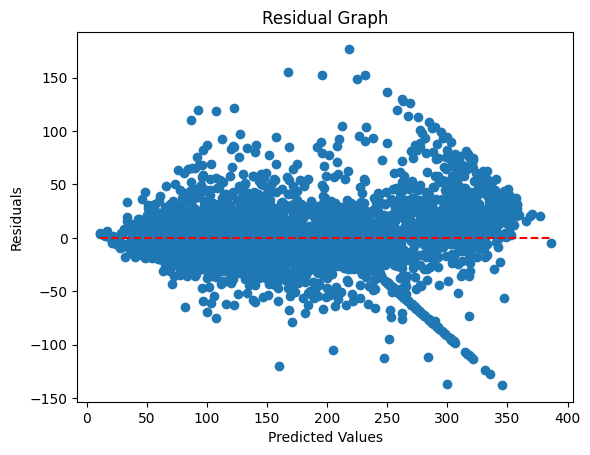

In [85]:
def plot_residual_graph(test_target,test_preds):
   
    residuals = test_target - test_preds

    plt.scatter(test_preds, residuals)
    plt.hlines(0, min(test_preds), max(test_preds), colors='r', linestyles='dashed')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Graph')
    plt.show()

plot_residual_graph(test_target,test_preds)

In [86]:

def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df['Date'] = pd.to_datetime(input_df['Date'], format='%d-%m-%Y')
    input_df['Year'] = input_df['Date'].dt.year
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = best_model.predict(X_input)[0]
    return pred

In [87]:

new_input = {'City': 'Delhi',
             'PM2.5': 23.2,
             'PM10': 33.2,
             'NO': 10.2,
             'NO2': 4.2,
             'NOx': 10.4,
             'NH3': 52.0,
             'CO': 13.0,
             'SO2': 20.0,
             'Toluene': 89.0,
             'Date': '01-01-2019',
           }

predict_input(new_input)

179.18723805392509

In [88]:
results_df = pd.DataFrame(results)

In [89]:
results_df

,Model,Train R2 Score,Validation R2 Score,Test R2 Score
0,LinearRegression,0.709617,0.700867,0.706240
1,Ridge,0.709617,0.700866,0.706240
2,SGDRegressor,0.709292,0.700542,0.705863
3,ElasticNet,0.643143,0.632692,0.640243
4,Lasso,0.687899,0.678729,0.685958
5,SVR,0.685983,0.680868,0.685403
6,GradientBoostingRegressor,0.840000,0.829105,0.840527
7,DecisionTreeRegressor,0.999790,0.727603,0.939892
8,RandomForestRegressor,0.979563,0.857253,0.954435


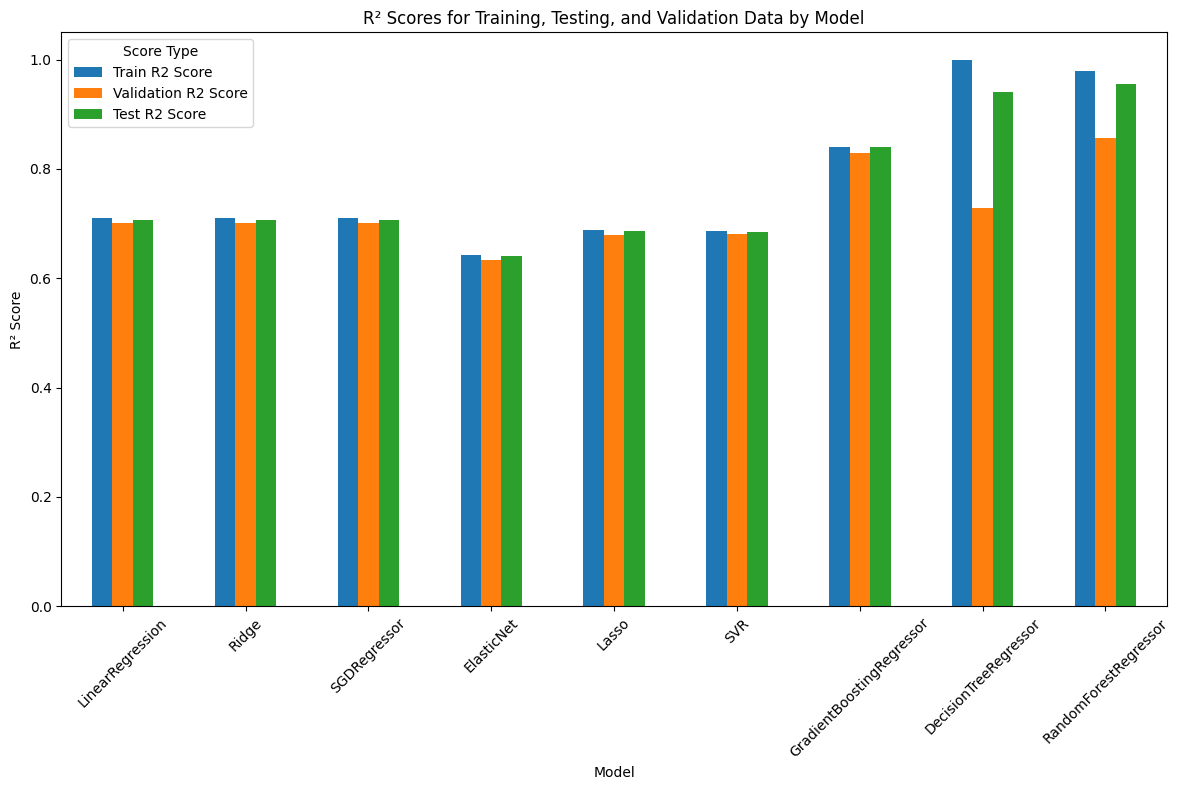

In [90]:

results_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('R² Scores for Training, Testing, and Validation Data by Model')
plt.xlabel('Model')
plt.ylabel('R² Score')
plt.legend(title='Score Type')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()